Build week :- Student Exam Performance

Team members :-

Yash

Vaali nandhan

Suraj Mate

#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np


Loading the Dataset

In [ ]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
print("skewness")
df.skew(numeric_only=True)

skewness


,0
math score,-0.278935
reading score,-0.259105
writing score,-0.289444


In [ ]:
print("kurtosis")
df.kurt(numeric_only=True)

kurtosis


,0
math score,0.274964
reading score,-0.068265
writing score,-0.033365


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#Removing Duplicactes



In [ ]:
def clean_data(data):
    # Duplicate value treatment
    print(f"Duplicate values found: {data.duplicated().sum()}")
    print(f"Duplicates removed. Remaining rows: {len(data.drop_duplicates())}")

    return data.drop_duplicates()

In [ ]:
df = clean_data(df)

Duplicate values found: 0
Duplicates removed. Remaining rows: 1000


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# EDA (Exploratory Data Anaysis)

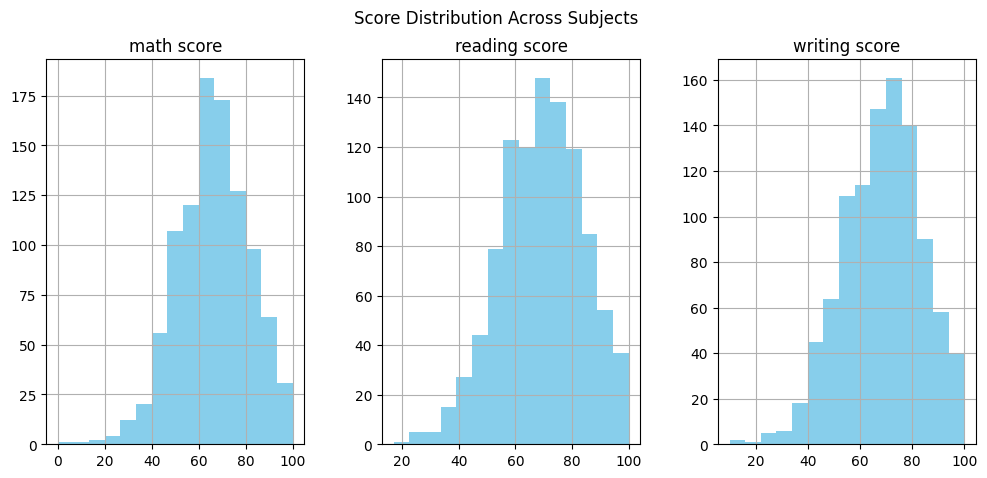

In [ ]:
# EDA (Exploratory Data Anaysis)
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of all scores
df[["math score", "reading score", "writing score"]].hist(bins=15, figsize=(12, 5), layout=(1, 3), color='skyblue')
plt.suptitle("Score Distribution Across Subjects")
plt.show()


/tmp/ipython-input-64-748934164.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-64-748934164.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-64-748934164.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




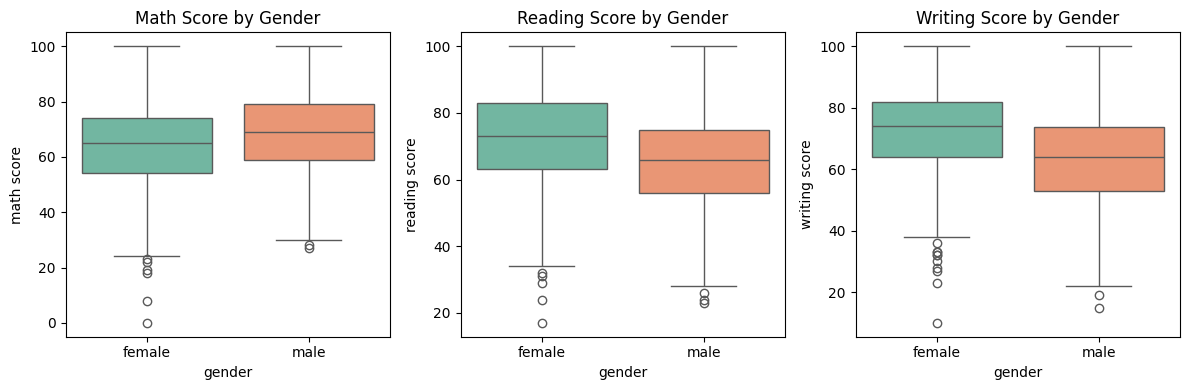

In [ ]:
# Boxplot for gender vs scores
plt.figure(figsize=(12, 4))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='gender', y=subject, data=df, palette='Set2')
    plt.title(f'{subject.replace("_", " ").title()} by Gender')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

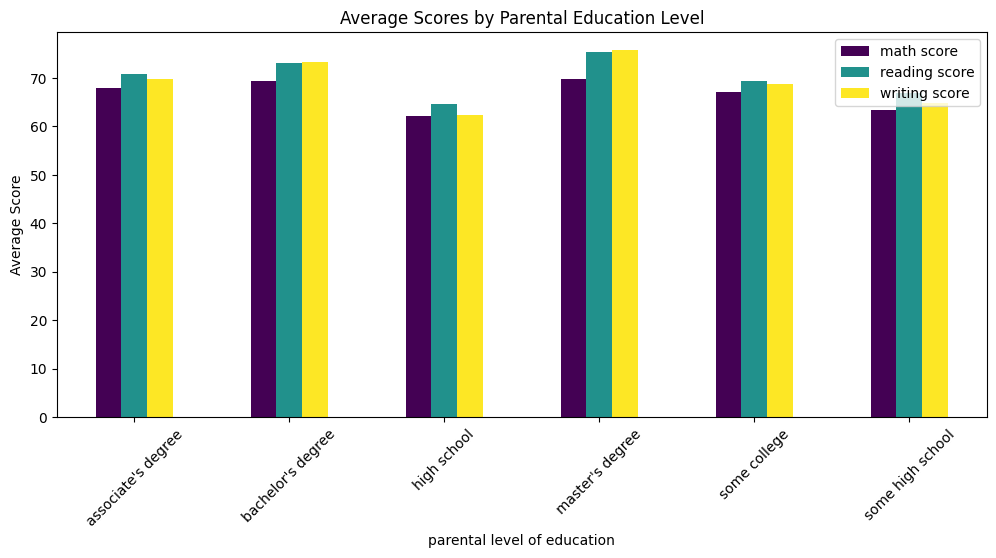

In [ ]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
df_grouped.plot(kind='bar', figsize=(12, 5), colormap='viridis')
plt.title("Average Scores by Parental Education Level")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-66-500427435.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-66-500427435.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




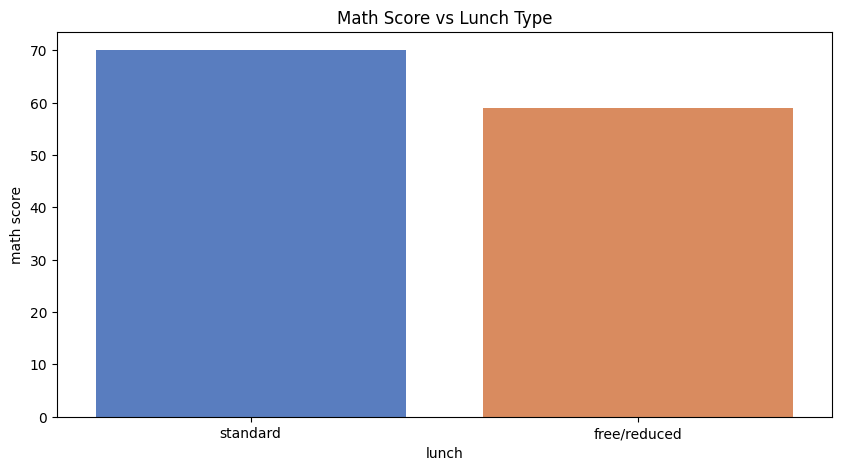

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='lunch', y='math score', ci=None, palette='muted')
plt.title("Math Score vs Lunch Type")
plt.show()


/tmp/ipython-input-67-4198743606.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




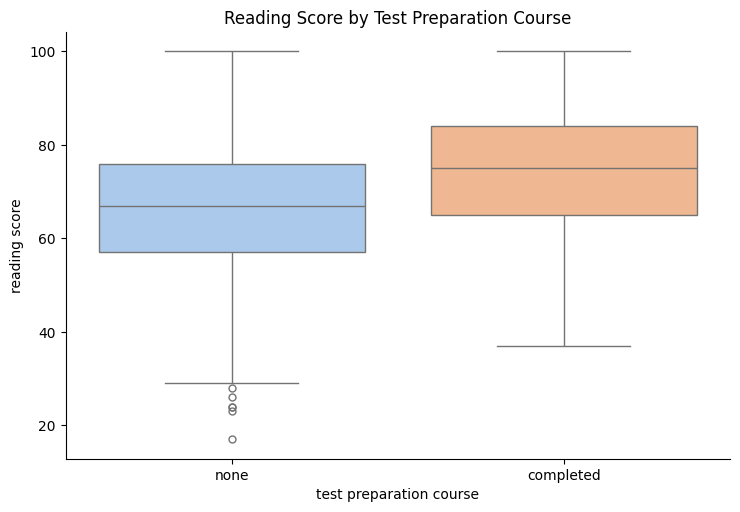

In [ ]:
sns.catplot(data=df, x='test preparation course', y='reading score', kind='box', height=5, aspect=1.5, palette='pastel')
plt.title("Reading Score by Test Preparation Course")
plt.show()


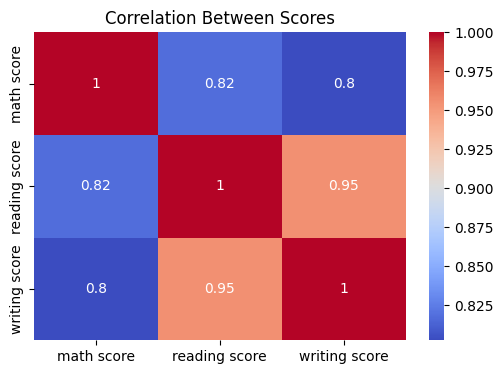

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()


/tmp/ipython-input-69-436026528.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




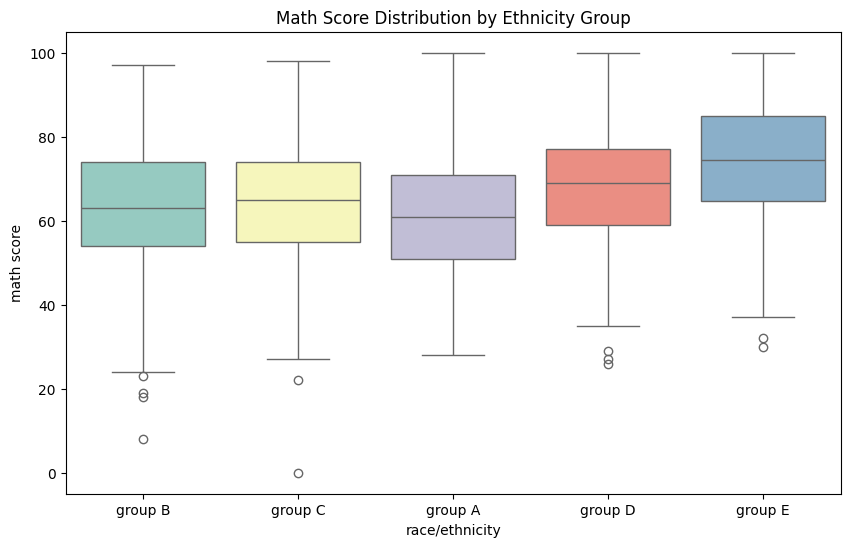

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="race/ethnicity", y="math score", data=df, palette="Set3")
plt.title("Math Score Distribution by Ethnicity Group")
plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter(df, x="reading score", y="writing score", color="gender",
                 size="math score", hover_data=["race/ethnicity"])
fig.update_layout(title="Reading vs Writing Scores (Bubble Size: Math Score)")
fig.show()


# Project insights

<Axes: xlabel='gender'>

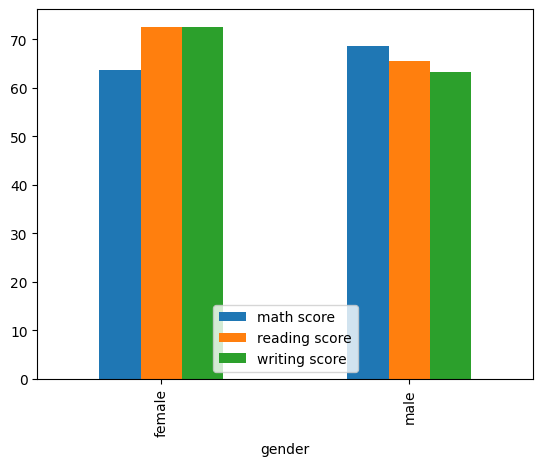

In [ ]:
# Project insights
# Average score by gender across subjects
df.groupby("gender")[["math score", "reading score", "writing score"]].mean().plot(kind="bar")



<Axes: xlabel='parental level of education'>

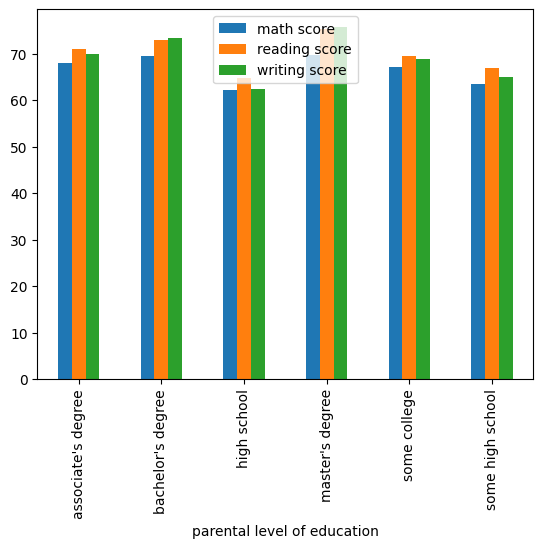

In [ ]:
# Compare scores based on parental level of education
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().plot(kind="bar")


In [ ]:
# Average scores by lunch type
df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()






,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [ ]:
# T-test (math score by lunch type)
from scipy.stats import ttest_ind
standard = df[df['lunch'] == 'standard']['math score']
reduced = df[df['lunch'] == 'free/reduced']['math score']
ttest_ind(standard, reduced)


TtestResult(statistic=np.float64(11.837180472914612), pvalue=np.float64(2.4131955993137074e-30), df=np.float64(998.0))

In [ ]:
# Compare scores based on test preparation
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()



,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [ ]:
# T-test (reading score)
prep_completed = df[df['test preparation course'] == 'completed']['reading score']
prep_none = df[df['test preparation course'] == 'none']['reading score']
ttest_ind(prep_completed, prep_none)


TtestResult(statistic=np.float64(7.871663538941468), pvalue=np.float64(9.081783336892205e-15), df=np.float64(998.0))

In [ ]:
# Mean scores by ethnicity
df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean().sort_values("math score")



,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<Axes: xlabel='race/ethnicity', ylabel='math score'>

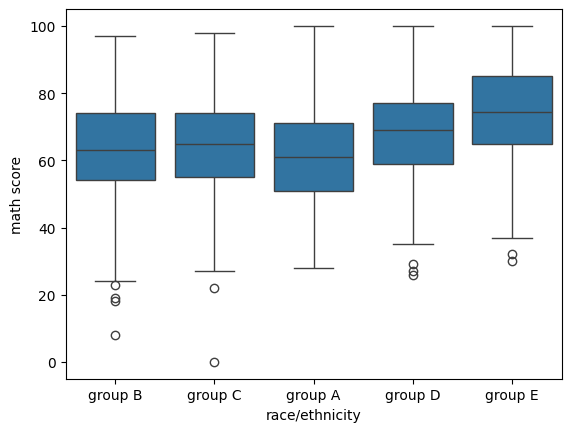

In [ ]:

# Visual
sns.boxplot(data=df, x="race/ethnicity", y="math score")

In [ ]:
# Correlation matrix
df[["math score", "reading score", "writing score"]].corr()



,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

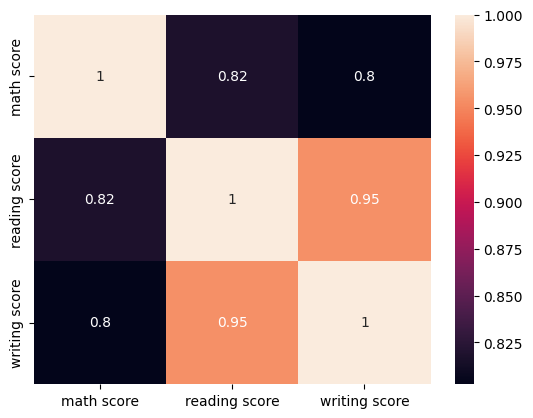

In [ ]:
# Heatmap
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True)


In [ ]:
# Mean and std for subjects
df[["math score", "reading score", "writing score"]].agg(["mean", "std"])


,math score,reading score,writing score
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657


In [ ]:
import sqlite3

In [ ]:
# ✅ STEP 1: Install & import packages
import pandas as pd
import sqlite3

# ✅ STEP 2: Load your StudentsPerformance.csv
df = pd.read_csv('/content/StudentsPerformance.csv')  # update path if needed

# ✅ STEP 3: Create SQLite in-memory database and load dataframe
conn = sqlite3.connect(':memory:')
df.to_sql('StudentsPerformance', conn, index=False, if_exists='replace')

# ✅ STEP 4: Define all your queries
queries = [
    # 1. Select all
    "SELECT * FROM StudentsPerformance LIMIT 5;",

    # 2. Top 5 students with highest math score
    """
    SELECT *
    FROM StudentsPerformance
    ORDER BY "math score" DESC
    LIMIT 5;
    """,

    # 3. Count number of students per gender
    """
    SELECT gender, COUNT(*) AS count
    FROM StudentsPerformance
    GROUP BY gender;
    """,

    # 4. Average reading score by race/ethnicity
    """
    SELECT "race/ethnicity", AVG("reading score") AS avg_reading_score
    FROM StudentsPerformance
    GROUP BY "race/ethnicity";
    """,

    # 5. Students with the lowest writing score
    """
    SELECT *
    FROM StudentsPerformance
    WHERE "writing score" = (
        SELECT MIN("writing score") FROM StudentsPerformance
    );
    """,

    # 6. Count students based on test preparation
    """
    SELECT "test preparation course", COUNT(*) AS count
    FROM StudentsPerformance
    GROUP BY "test preparation course";
    """,

    # 7. Average scores by parental level of education
    """
    SELECT "parental level of education",
           AVG("math score") AS avg_math,
           AVG("reading score") AS avg_reading,
           AVG("writing score") AS avg_writing
    FROM StudentsPerformance
    GROUP BY "parental level of education";
    """,

    # 8. Female students with >90 in all subjects
    """
    SELECT *
    FROM StudentsPerformance
    WHERE gender = 'female'
      AND "math score" > 90
      AND "reading score" > 90
      AND "writing score" > 90;
    """,

    # 9. Students count per lunch category
    """
    SELECT lunch, COUNT(*) AS count
    FROM StudentsPerformance
    GROUP BY lunch;
    """,

    # 10. Top 3 race/ethnicity groups by avg writing score
    """
    SELECT "race/ethnicity", AVG("writing score") AS avg_writing
    FROM StudentsPerformance
    GROUP BY "race/ethnicity"
    ORDER BY avg_writing DESC
    LIMIT 3;
    """,

    # 11. Students with reading score above average
    """
    SELECT *
    FROM StudentsPerformance
    WHERE "reading score" > (
        SELECT AVG("reading score") FROM StudentsPerformance
    );
    """,

    # 12. Math score with overall avg using window
    """
    SELECT *,
           AVG("math score") OVER () AS overall_avg_math
    FROM StudentsPerformance
    LIMIT 5;
    """,

    # 13. Students whose math score > previous student's math score
    """
    SELECT gender,
           "reading score",
           "math score",
           LAG("math score", 1) OVER (ORDER BY "reading score") AS prev_math_score
    FROM StudentsPerformance
    LIMIT 10;
    """,

    # 14. Students whose total score > average total using CTE
    """
    WITH student_totals AS (
        SELECT *,
               ("math score" + "reading score" + "writing score") AS total_score
        FROM StudentsPerformance
    ),
    average_total AS (
        SELECT AVG(total_score) AS avg_total FROM student_totals
    )
    SELECT s.*
    FROM student_totals s, average_total a
    WHERE s.total_score > a.avg_total
    LIMIT 10;
    """
]

# ✅ STEP 5: Execute & display each query systematically
for i, query in enumerate(queries, 1):
    print(f"\n⚡️ Query {i} Result:")
    display(pd.read_sql_query(query, conn))



⚡️ Query 1 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



⚡️ Query 2 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,free/reduced,completed,100,100,93
1,female,group E,some college,standard,none,100,92,97
2,female,group E,bachelor's degree,standard,none,100,100,100
3,male,group A,some college,standard,completed,100,96,86
4,male,group D,some college,standard,completed,100,97,99



⚡️ Query 3 Result:


,gender,count
0,female,518
1,male,482



⚡️ Query 4 Result:


,race/ethnicity,avg_reading_score
0,group A,64.674157
1,group B,67.352632
2,group C,69.103448
3,group D,70.030534
4,group E,73.028571



⚡️ Query 5 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10



⚡️ Query 6 Result:


,test preparation course,count
0,completed,358
1,none,642



⚡️ Query 7 Result:


,parental level of education,avg_math,avg_reading,avg_writing
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268



⚡️ Query 8 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,bachelor's degree,standard,completed,99,100,100
1,female,group C,bachelor's degree,standard,completed,96,100,100
2,female,group D,some high school,standard,completed,97,100,100
3,female,group E,some college,standard,none,100,92,97
4,female,group E,bachelor's degree,standard,none,100,100,100
5,female,group A,some high school,standard,completed,92,100,97
6,female,group E,bachelor's degree,free/reduced,completed,92,100,100
7,female,group C,bachelor's degree,standard,completed,92,100,99
8,female,group E,master's degree,standard,completed,94,99,100
9,female,group D,some college,standard,none,98,100,99



⚡️ Query 9 Result:


,lunch,count
0,free/reduced,355
1,standard,645



⚡️ Query 10 Result:


,race/ethnicity,avg_writing
0,group E,71.407143
1,group D,70.145038
2,group C,67.827586



⚡️ Query 11 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group C,some college,standard,none,76,78,75
4,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
508,female,group D,bachelor's degree,free/reduced,none,62,72,74
509,female,group E,master's degree,standard,completed,88,99,95
510,female,group C,high school,free/reduced,completed,59,71,65
511,female,group D,some college,standard,completed,68,78,77



⚡️ Query 12 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_avg_math
0,female,group B,bachelor's degree,standard,none,72,72,74,66.089
1,female,group C,some college,standard,completed,69,90,88,66.089
2,female,group B,master's degree,standard,none,90,95,93,66.089
3,male,group A,associate's degree,free/reduced,none,47,57,44,66.089
4,male,group C,some college,standard,none,76,78,75,66.089



⚡️ Query 13 Result:


,gender,reading score,math score,prev_math_score
0,female,17,0,NaN
1,male,23,28,0.0
2,male,24,30,28.0
3,female,24,8,30.0
4,male,26,30,8.0
5,male,28,35,30.0
6,female,29,29,35.0
7,male,29,36,29.0
8,female,31,26,36.0
9,male,31,51,26.0



⚡️ Query 14 Result:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group C,some college,standard,none,76,78,75,229
4,female,group B,associate's degree,standard,none,71,83,78,232
5,female,group B,some college,standard,completed,88,95,92,275
6,female,group B,high school,standard,none,65,81,73,219
7,male,group A,some college,standard,completed,78,72,70,220
8,female,group C,some high school,standard,none,69,75,78,222
9,male,group C,high school,standard,none,88,89,86,263
